# SI 618 - Homework #2: More Data Manipulation

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

Version 2024.01.23.2.CT

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided via the URLs shown:
- invoices.json https://github.com/umsi-data-science/data/raw/main/invoices.json
- items.json https://github.com/umsi-data-science/data/raw/main/items.json
- purchases.json https://github.com/umsi-data-science/data/raw/main/purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Answer the questions below.
- write your Python code that can answer the following questions 
- explain **ALL** your answers in plain English. 
- you can use as many code and markdown cells as you need for each question (i.e. don't limit yourself to just one of each if you feel you need more).

In [69]:
MY_UNIQNAME = 'aanaa'  # replace this with your uniqname

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What is the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

### Q1: load the data

In [70]:

invoices = pd.read_json('https://github.com/umsi-data-science/data/raw/main/invoices.json')
items = pd.read_json("https://github.com/umsi-data-science/data/raw/main/items.json")
purchases = pd.read_json('https://github.com/umsi-data-science/data/raw/main/purchases.json')

In [71]:
invoices.head()

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


In [72]:
items.head()

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [73]:
purchases.head()

,InvoiceNo,StockCodeSC,Quantity
0,536365,SC85123A,6
1,536365,SC71053,6
2,536365,SC84406B,8
3,536365,SC84029G,6
4,536365,SC84029E,6


### Q2: How many total invoices have been placed?

In [74]:
# drop invoices that start with C
invos_drop = invoices[invoices['InvoiceNo'].str.startswith('C')].index
invoices.drop(invos_drop, inplace=True)
# drop duplicates
invoices_unq = invoices.drop_duplicates(subset=['InvoiceNo'])
invoices_unq.shape


(22064, 4)

In [75]:
print(f' There are {invoices_unq.shape[0]} invoices have been placed')


 There are 22064 invoices have been placed


### Q3: How many unique customers are there?

In [76]:
u = invoices['CustomerID'].nunique()
print(f' There are {u} unique cutomers')

 There are 4339 unique cutomers


### Q4: What is the total number of unique items?

In [77]:

items['StockCode'].nunique()

4070

### Q5: Are there any columns with null values?

In [78]:

print(invoices.isnull().sum())
print(items.isnull().sum())
print(purchases.isnull().sum())

InvoiceNo         0
InvoiceDate       0
CustomerID     3540
Country           0
dtype: int64
StockCode        0
Description    176
UnitPrice        0
dtype: int64
InvoiceNo      0
StockCodeSC    0
Quantity       0
dtype: int64


The `CustomerID` column in `invoices` contains 3722 missing values

The `Description` column in `items` contains 176 missing values

### Q6: Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

1. First delete the records starting with C for 'InvoiceNo'.
2. The invoice table can be merged with the purchase table using the 'invoiceNo' attibutes.
3. The items table can be merged with the purchase table using the 'StockCode' attibutes(for the purchase table, the column 'StockCodeSC' needs to be modified: delete each one starting with 'SC')


### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

### part(1)

In [79]:
# the top 10 customers who have placed an invoice.
invoices_unq['CustomerID'].value_counts().head(10)


CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
Name: count, dtype: int64

### part(2) List the top 10 customers in descending order.

In [80]:
# drop purchases that start with C 
pur_drop = purchases[purchases['InvoiceNo'].str.startswith('C')].index
purchases.drop(pur_drop, inplace=True)

In [81]:
pur_invo = pd.merge(purchases, invoices_unq, on='InvoiceNo', how='left')
pur_invo.head()

,InvoiceNo,StockCodeSC,Quantity,InvoiceDate,CustomerID,Country
0,536365,SC85123A,6,12/1/10 8:26,17850.0,United Kingdom
1,536365,SC71053,6,12/1/10 8:26,17850.0,United Kingdom
2,536365,SC84406B,8,12/1/10 8:26,17850.0,United Kingdom
3,536365,SC84029G,6,12/1/10 8:26,17850.0,United Kingdom
4,536365,SC84029E,6,12/1/10 8:26,17850.0,United Kingdom


In [82]:
#  total quantity of items ordered for top 10 customers.
pur_invo.groupby('CustomerID')['Quantity'].sum().sort_values(ascending= False).head(10)

CustomerID
14646.0    197491
16446.0     80997
14911.0     80515
12415.0     77670
12346.0     74215
17450.0     69993
17511.0     64549
18102.0     64124
13694.0     63312
14298.0     58343
Name: Quantity, dtype: int64

### part (3) Does it appear that the more invoices a customer have, the greater the total quantity of items? 

Won't. Based on the comparison between the results from parts (1) and (2), it shows the Customers have big difference. It is not necessarily true that customers with more invoices purchase a greater total quantity of items. 

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $25?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 

### part(1) What is the average item-unit price? 

In [83]:
items.shape[0] == items['StockCode'].nunique()

True

In [84]:
a = items['UnitPrice'].mean()
print(f'The average unit price of all item is ${a:.2f}')

The average unit price of all item is $6.91


### part(2) What % of items are under $25?

In [85]:
b = items[items['UnitPrice'] < 25].shape[0]/items.shape[0]

print(f'{b*100:.2f}% of items cost less than $25')

98.75% of items cost less than $25


### part(3) Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram?

In [86]:
# check min and max of unit price
items['UnitPrice'].sort_values(ascending= True).head(10)


3260    0.0
3283    0.0
3282    0.0
3280    0.0
3279    0.0
3278    0.0
3277    0.0
3275    0.0
3274    0.0
3273    0.0
Name: UnitPrice, dtype: float64

In [87]:
items['UnitPrice'].sort_values(ascending= False).head(10)


3753    11062.06
952       569.77
1591      295.00
2541      175.00
190       165.00
2397      165.00
2619      125.00
2785      125.00
3732       83.33
1445       79.95
Name: UnitPrice, dtype: float64

<Axes: >

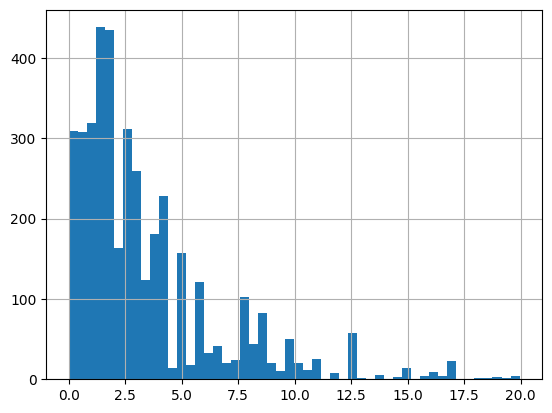

In [88]:
up_less20 = items[items['UnitPrice'] <= 20]
up_less20['UnitPrice'].hist(bins=50)

In [89]:
up_over20 = items[items['UnitPrice'] > 20].value_counts().sum()
percent_over20 = up_over20/items.shape[0]
print(f'{percent_over20*100:.2f}% of items cost more than $20')

1.62% of items cost more than $20


The reason I chose 20 is because there are only 66 items over 20 dollar, accounting for 1.62 percent of the total. If I plot a histogram of all product unit prices, the chart will expand the range of each bin, what we can observe is limited, and the information from the histogram with all product unit prices will be lost. Also, from the histogram, the most purchased products are concentrated under 5 dollor.

### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them. Do you see any trends?  
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by "marking up" the unit price by 25%.) 
1. Do the top 5 invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

part(a)

In [90]:
# remove the SC prefix from StockCodeSC
purchases['StockCode'] = purchases['StockCodeSC'].astype(str).str.replace('SC', '')
purchases.head()

,InvoiceNo,StockCodeSC,Quantity,StockCode
0,536365,SC85123A,6,85123A
1,536365,SC71053,6,71053
2,536365,SC84406B,8,84406B
3,536365,SC84029G,6,84029G
4,536365,SC84029E,6,84029E


In [91]:
pur_items = pd.merge(purchases, items, on='StockCode', how='left')
pur_items.head()

,InvoiceNo,StockCodeSC,Quantity,StockCode,Description,UnitPrice
0,536365,SC85123A,6,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,536365,SC71053,6,71053,WHITE METAL LANTERN,3.39
2,536365,SC84406B,8,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,536365,SC84029G,6,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,536365,SC84029E,6,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [92]:
# find the top 10 most popular items
popular10 = purchases.groupby('StockCode')['Quantity'].sum().sort_values(ascending= False).head(10)
popular10

StockCode
23843     80995
23166     78033
22197     56921
84077     55047
85099B    48478
85123A    41408
21212     36419
84879     36301
23084     30754
22492     26633
Name: Quantity, dtype: int64

In [93]:
# 10 most popular items with their descriptions
top10_items = pd.merge(popular10, items, on='StockCode', how='left')
print(top10_items)
top10_items['Description']


  StockCode  Quantity                         Description  UnitPrice
0     23843     80995         PAPER CRAFT , LITTLE BIRDIE       2.08
1     23166     78033      MEDIUM CERAMIC TOP STORAGE JAR       1.04
2     22197     56921                SMALL POPCORN HOLDER       0.72
3     84077     55047   WORLD WAR 2 GLIDERS ASSTD DESIGNS       0.29
4    85099B     48478             JUMBO BAG RED RETROSPOT       1.65
5    85123A     41408  WHITE HANGING HEART T-LIGHT HOLDER       2.55
6     21212     36419     PACK OF 72 RETROSPOT CAKE CASES       0.42
7     84879     36301       ASSORTED COLOUR BIRD ORNAMENT       1.69
8     23084     30754                  RABBIT NIGHT LIGHT       2.08
9     22492     26633             MINI PAINT SET VINTAGE        0.65


0           PAPER CRAFT , LITTLE BIRDIE
1        MEDIUM CERAMIC TOP STORAGE JAR
2                  SMALL POPCORN HOLDER
3     WORLD WAR 2 GLIDERS ASSTD DESIGNS
4               JUMBO BAG RED RETROSPOT
5    WHITE HANGING HEART T-LIGHT HOLDER
6       PACK OF 72 RETROSPOT CAKE CASES
7         ASSORTED COLOUR BIRD ORNAMENT
8                    RABBIT NIGHT LIGHT
9               MINI PAINT SET VINTAGE 
Name: Description, dtype: object

part(b)

In [94]:
# merge purchases and invoices_unq tables
pur_invo2 = pd.merge(purchases, invoices_unq, on='InvoiceNo', how='left')
pur_invo2

,InvoiceNo,StockCodeSC,Quantity,StockCode,InvoiceDate,CustomerID,Country
0,536365,SC85123A,6,85123A,12/1/10 8:26,17850.0,United Kingdom
1,536365,SC71053,6,71053,12/1/10 8:26,17850.0,United Kingdom
2,536365,SC84406B,8,84406B,12/1/10 8:26,17850.0,United Kingdom
3,536365,SC84029G,6,84029G,12/1/10 8:26,17850.0,United Kingdom
4,536365,SC84029E,6,84029E,12/1/10 8:26,17850.0,United Kingdom
...,...,...,...,...,...,...,...
532616,581587,SC22613,12,22613,12/9/11 12:50,12680.0,France
532617,581587,SC22899,6,22899,12/9/11 12:50,12680.0,France
532618,581587,SC23254,4,23254,12/9/11 12:50,12680.0,France
532619,581587,SC23255,4,23255,12/9/11 12:50,12680.0,France


In [95]:
# then merge three tables together and calculate the total price
all_table = pd.merge(pur_invo2, items, on='StockCode', how='left')
all_table['TotalPrice'] = all_table['Quantity'] * all_table['UnitPrice'] *1.25

all_table

,InvoiceNo,StockCodeSC,Quantity,StockCode,InvoiceDate,CustomerID,Country,Description,UnitPrice,TotalPrice
0,536365,SC85123A,6,85123A,12/1/10 8:26,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2.55,19.1250
1,536365,SC71053,6,71053,12/1/10 8:26,17850.0,United Kingdom,WHITE METAL LANTERN,3.39,25.4250
2,536365,SC84406B,8,84406B,12/1/10 8:26,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,2.75,27.5000
3,536365,SC84029G,6,84029G,12/1/10 8:26,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,25.4250
4,536365,SC84029E,6,84029E,12/1/10 8:26,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,3.39,25.4250
...,...,...,...,...,...,...,...,...,...,...
532616,581587,SC22613,12,22613,12/9/11 12:50,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,1.66,24.9000
532617,581587,SC22899,6,22899,12/9/11 12:50,12680.0,France,CHILDREN'S APRON DOLLY GIRL,2.10,15.7500
532618,581587,SC23254,4,23254,12/9/11 12:50,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,4.15,20.7500
532619,581587,SC23255,4,23255,12/9/11 12:50,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,4.15,20.7500


In [96]:
# the top 5 invoices with the highest total price
top5_invos = all_table.groupby('InvoiceNo')['TotalPrice'].sum().sort_values(ascending= False).head(5)
print(top5_invos)

InvoiceNo
547966    712212.5000
581483    210587.0000
541431     96479.5000
556255     37305.0000
556917     34545.9125
Name: TotalPrice, dtype: float64


part(c)

In [97]:
# items in the top 5 invoices
s = all_table[all_table['InvoiceNo'].isin(top5_invos.index)]
print(s)

       InvoiceNo StockCodeSC  Quantity StockCode    InvoiceDate  CustomerID  \
60580     541431     SC23166     74215     23166  1/18/11 10:01     12346.0   
134078    547966       SCDOT      1000       DOT  3/28/11 15:49         NaN   
217550    556255     SC48138       300     48138   6/9/11 17:27     18102.0   
217551    556255    SC48173C       300    48173C   6/9/11 17:27     18102.0   
217552    556255     SC48188       300     48188   6/9/11 17:27     18102.0   
...          ...         ...       ...       ...            ...         ...   
224157    556917     SC22364        24     22364  6/15/11 13:37     12415.0   
224158    556917     SC22363        24     22363  6/15/11 13:37     12415.0   
224159    556917     SC21115        16     21115  6/15/11 13:37     12415.0   
224160    556917     SC22308        50     22308  6/15/11 13:37     12415.0   
531140    581483     SC23843     80995     23843   12/9/11 9:15     16446.0   

               Country                     Descript

In [98]:
s[s['StockCode'].isin(top10_items['StockCode'])].value_counts()

InvoiceNo  StockCodeSC  Quantity  StockCode  InvoiceDate    CustomerID  Country         Description                      UnitPrice  TotalPrice
541431     SC23166      74215     23166      1/18/11 10:01  12346.0     United Kingdom  MEDIUM CERAMIC TOP STORAGE JAR   1.04       96479.50      1
556917     SC21212      240       21212      6/15/11 13:37  12415.0     Australia       PACK OF 72 RETROSPOT CAKE CASES  0.42       126.00        1
           SC22492      576       22492      6/15/11 13:37  12415.0     Australia       MINI PAINT SET VINTAGE           0.65       468.00        1
           SC23084      240       23084      6/15/11 13:37  12415.0     Australia       RABBIT NIGHT LIGHT               2.08       624.00        1
           SC23166      96        23166      6/15/11 13:37  12415.0     Australia       MEDIUM CERAMIC TOP STORAGE JAR   1.04       124.80        1
           SC85099B     100       85099B     6/15/11 13:37  12415.0     Australia       JUMBO BAG RED RETROSPOT      

In [99]:
s[s['StockCode'].isin(top10_items['StockCode'])]['StockCode'].value_counts()

StockCode
23166     2
23084     1
85099B    1
22492     1
21212     1
23843     1
Name: count, dtype: int64

Do the top 5 invoices contain any of the top 10 most ordered items?

Yes, top 5 invoices contain 6 of the top 10 items

### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1750  
 * medium value: between 1750 and 8250 dollars
 * high value: greater than \$8250
1. How many customers are in each segment? 
1. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
1. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
1. Choose three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

In [100]:
total_revenue = all_table.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending= False)
total_revenue = pd.DataFrame(total_revenue)
total_revenue.columns = ['TotalRevenue']

In [101]:
total_revenue['segment'] = total_revenue['TotalRevenue'].apply(lambda x: 'high value' if x > 8250 else 'medium value' if x >= 1750 else 'low value')

In [102]:
total_revenue

,TotalRevenue,segment
CustomerID,,
18102.0,510949.9500,high value
14646.0,446913.8625,high value
17450.0,232746.2875,high value
14911.0,228496.5500,high value
16446.0,210590.6250,high value
...,...,...
14792.0,10.5750,low value
16738.0,4.6875,low value
15802.0,1.5625,low value


In [103]:
all_table_seg = pd.merge(all_table, total_revenue, on='CustomerID', how='inner')

In [104]:
all_table_seg[all_table_seg['TotalRevenue'] == 'high value'].groupby('Description')['Quantity'].sum().sort_values(ascending= False).head(10)

all_table_seg.head()

,InvoiceNo,StockCodeSC,Quantity,StockCode,InvoiceDate,CustomerID,Country,Description,UnitPrice,TotalPrice,TotalRevenue,segment
0,536365,SC85123A,6,85123A,12/1/10 8:26,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2.55,19.125,6785.5125,medium value
1,536365,SC71053,6,71053,12/1/10 8:26,17850.0,United Kingdom,WHITE METAL LANTERN,3.39,25.425,6785.5125,medium value
2,536365,SC84406B,8,84406B,12/1/10 8:26,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,2.75,27.500,6785.5125,medium value
3,536365,SC84029G,6,84029G,12/1/10 8:26,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,25.425,6785.5125,medium value
4,536365,SC84029E,6,84029E,12/1/10 8:26,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,3.39,25.425,6785.5125,medium value


In [105]:
total_revenue.segment.value_counts()

segment
low value       2846
medium value    1255
high value       238
Name: count, dtype: int64

Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.

In [106]:
p = all_table_seg.pivot_table(index='StockCode',columns='segment',values='Quantity',aggfunc='mean')
p

segment,high value,low value,medium value
StockCode,,,
10002,33.200000,8.222222,10.040000
10080,7.000000,11.000000,15.857143
10120,2.333333,4.692308,8.928571
10123C,NaN,2.000000,1.000000
10124A,NaN,3.500000,3.000000
...,...,...,...
C2,1.000000,1.040000,1.000000
DOT,1.000000,NaN,NaN
M,69.870588,5.489583,6.541284


Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 

In [107]:
p.sort_values(by='high value',ascending=False).head(10)

segment,high value,low value,medium value
StockCode,,,
23843,80995.000000,NaN,NaN
84826,2556.000000,15.846154,39.777778
47556B,1300.000000,NaN,NaN
23166,912.952381,10.647059,10.873016
84568,840.000000,452.571429,288.000000
84422,480.000000,9.500000,11.000000
16033,480.000000,NaN,120.000000
17003,266.975610,69.242857,73.163265
16216,261.125000,44.687500,30.117647


In [108]:
p.sort_values(by='medium value',ascending=False).head(10)

segment,high value,low value,medium value
StockCode,,,
18007,24.000000,16.000000,710.000000
16014,23.285714,19.571429,390.636364
84598,192.000000,288.000000,288.000000
84568,840.000000,452.571429,288.000000
22053,24.250000,10.000000,285.857143
21785,1.000000,NaN,204.000000
62018,10.578947,34.533333,147.320000
16049,90.000000,90.000000,144.000000
75131,6.500000,9.750000,132.333333


In [109]:
p.sort_values(by='low value',ascending=False).head(10)

segment,high value,low value,medium value
StockCode,,,
17096,96.000000,516.750000,36.714286
84568,840.000000,452.571429,288.000000
84598,192.000000,288.000000,288.000000
16045,131.250000,151.851852,103.846154
16259,124.571429,122.833333,86.166667
17084R,248.000000,120.000000,80.000000
16049,90.000000,90.000000,144.000000
21641,32.222222,79.000000,30.000000
17001,NaN,72.000000,NaN


Explanation: The items with the highest average order quantity are not the same in different market segments. : In the "high value" segment, the product with the highest average order quantity is the product with StockCode 23843, and the average quantity is 80995.
In the "medium value" segment, the product with the highest average order quantity is the product with StockCode 18007, and the average quantity is 710.
In the "low value" segment, the product with the highest average order quantity is the product with StockCode 17096, and the average quantity is 516.75

Choose three items and discuss any trends/differences you notice across the three segments.

item 1: 

StockCode: 84826 

Description : ASSTD DESIGN 3D PAPER STICKERS

In [110]:
all_table_seg[all_table_seg['StockCode'] == '18007']['Description'].value_counts()

Description
ESSENTIAL BALM 3.5g TIN IN ENVELOPE    18
Name: count, dtype: int64

In [111]:
all_table_seg[all_table_seg['StockCode'] == '84826'].groupby('segment')['Quantity'].sum()


segment
high value      12780
low value         206
medium value      716
Name: Quantity, dtype: int64

In [112]:
all_table_seg[all_table_seg['StockCode'] == '84826']['UnitPrice'].value_counts()

UnitPrice
0.85    36
Name: count, dtype: int64

 The quantity for this item is significantly higher in the high value segment, with a total quantity of 12780. This suggests that customers in this segment are either buying in bulk or this item is particularly popular among high value customers.

item 2:

StockCode: 18007 

Description : ESSENTIAL BALM 3.5g TIN IN ENVELOPE

In [113]:
all_table_seg[all_table_seg['StockCode'] == '18007']['Description'].value_counts()

Description
ESSENTIAL BALM 3.5g TIN IN ENVELOPE    18
Name: count, dtype: int64

In [114]:
all_table_seg[all_table_seg['StockCode'] == '18007'].groupby('segment')['Quantity'].sum()

segment
high value        48
low value        128
medium value    5680
Name: Quantity, dtype: int64

In [115]:

all_table_seg[all_table_seg['StockCode'] == '18007']['UnitPrice'].value_counts()

UnitPrice
0.18    18
Name: count, dtype: int64

This item has a maximum quantity of 5680 in the mediem value segment.

item 3:

StockCode: 17096 

Description : ESSENTIAL BALM 3.5g TIN IN ENVELOPE

In [116]:
all_table_seg[all_table_seg['StockCode'] == '17096']['Description'].value_counts()

Description
ASSORTED LAQUERED INCENSE HOLDERS    13
Name: count, dtype: int64

In [117]:
all_table_seg[all_table_seg['StockCode'] == '17096'].groupby('segment')['Quantity'].sum()


segment
high value       192
low value       2067
medium value     257
Name: Quantity, dtype: int64

In [118]:
all_table_seg[all_table_seg['StockCode'] == '17096']['UnitPrice'].value_counts()

UnitPrice
0.43    13
Name: count, dtype: int64

This item has a maximum quantity of 2067 in the low value segment.

# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas